# Introduction to Scikit-learn (sklearn)

This Notebook demonstrates some of the most important functions of the  beautiful Scikit-learn library!

What we are goiong to cover:
 0. An end to end Scikit-learn workflow
 1. Getting the data ready
 2. Choose the right estimator/algorithm for our problems
 3. Fit the model/algorithm and use it to make predicitons on our data
 4. Evaluating the model
 5. improve the model
 6. Save and load a trained model
 7. Putting it aall together!

## 0. An end to end Scikit-learn workflow

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1. Get the data ready
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create x (features matrix)
x = heart_disease.drop("target",axis=1)

# Create y (labels)
y = heart_disease["target"]

In [4]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# we'll keeep the deafault hyperparameters 
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fot the model to the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [6]:
clf.fit(x_train,y_train);

In [7]:
# Make a prediction
y_preds=clf.predict(x_test)
y_preds

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [8]:
y_test

298    0
196    0
225    0
41     1
70     1
      ..
239    0
186    0
280    0
152    1
192    0
Name: target, Length: 61, dtype: int64

In [9]:
# 4. Evaluate the model
clf.score(x_train,y_train)

1.0

In [10]:
clf.score(x_test,y_test)

0.819672131147541

In [11]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76        23
           1       0.85      0.87      0.86        38

    accuracy                           0.82        61
   macro avg       0.81      0.80      0.81        61
weighted avg       0.82      0.82      0.82        61



In [12]:
confusion_matrix(y_test,y_preds)

array([[17,  6],
       [ 5, 33]], dtype=int64)

In [13]:
accuracy_score(y_test,y_preds)

0.819672131147541

In [14]:
# 5. Improve the model
# Try different amount of n_estimators

np.random.seed(42)
for i in range(10,100,10):
    print(f"trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set: {clf.score(x_test,y_test) * 100:.2f}%")
    print(" ")

trying model with 10 estimators...
Model accuracy on test set: 75.41%
 
trying model with 20 estimators...
Model accuracy on test set: 78.69%
 
trying model with 30 estimators...
Model accuracy on test set: 81.97%
 
trying model with 40 estimators...
Model accuracy on test set: 83.61%
 
trying model with 50 estimators...
Model accuracy on test set: 81.97%
 
trying model with 60 estimators...
Model accuracy on test set: 78.69%
 
trying model with 70 estimators...
Model accuracy on test set: 85.25%
 
trying model with 80 estimators...
Model accuracy on test set: 83.61%
 
trying model with 90 estimators...
Model accuracy on test set: 85.25%
 


In [15]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl","wb"))

In [16]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(x_test,y_test)

0.8524590163934426

In [17]:
what_we_are_covering = ["0. An end to end Scikit-learn workflow",
 "1. Getting the data ready",
 "2. Choose the right estimator/algorithm for our problems",
 "3. Fit the model/algorithm and use it to make predicitons on our data",
 "4. Evaluating the model",
 "5. improve the model",
 "6. Save and load a trained model",
 "7. Putting it aall together!"]

In [18]:
what_we_are_covering

['0. An end to end Scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predicitons on our data',
 '4. Evaluating the model',
 '5. improve the model',
 '6. Save and load a trained model',
 '7. Putting it aall together!']

## 1. getting our data ready to be used with machine learning

Three main things to do:
    1. Split the data into features and labels (usually 'x' and 'y')
    2. Filling (also called imputing) or disregarding missing values
    3. Convertiing non-numerical values to numerical values (Feature Encoding)
    

In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
x = heart_disease.drop("target",axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [24]:
x.shape
x.shape[0]*0.8

242.4

In [25]:
len(heart_disease)

303

## 1.1 make sure its all numerical

In [26]:
car_sales=pd.read_csv("data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [27]:
len(car_sales)

1000

In [28]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [29]:
# Split into x and y
x = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

# Split into training and test 
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)

# Build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

##this throws error as TOYOTA is a string and can't be included in the training dataset

In [30]:
# Let's try and convert our data into numbers infact even the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [31]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [32]:
# One other way to do the above functionality is by using the pandas package 

dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]]) # Not sure why they're called "DUMMIES"!!!
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [33]:
# Let's refit the model
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size=0.2)

In [34]:
# Build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

##this throws error as TOYOTA is a string and can't be included in the training dataset

0.3235867221569877

In [35]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
model.score(x_test,y_test)

0.3281222657899089

### 1.2 What if there were missing values

1. Fill them with some value (also known as imputation).
2. remove the samples with missing data altogether.

In [37]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [38]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [39]:
# Lets try and convert the NaN into numbers
# Create x and y
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]


In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

ValueError: Input contains NaN

In [ ]:
car_sales_missing

#### Option 1: Fill missing data with Pandas

In [41]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing",inplace=True)

 # Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing",inplace=True)

#Fill the "Odometer" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4,inplace=True)

In [42]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [43]:
# Remove the rows with missing "Price" value (i.e, label) 
car_sales_missing.dropna(inplace=True)

In [44]:
car_sales_missing.isna().sum()
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [45]:
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]
x,y

(        Make Colour  Odometer (KM)  Doors
 0      Honda  White        35431.0    4.0
 1        BMW   Blue       192714.0    5.0
 2      Honda  White        84714.0    4.0
 3     Toyota  White       154365.0    4.0
 4     Nissan   Blue       181577.0    3.0
 ..       ...    ...            ...    ...
 995   Toyota  Black        35820.0    4.0
 996  missing  White       155144.0    3.0
 997   Nissan   Blue        66604.0    4.0
 998    Honda  White       215883.0    4.0
 999   Toyota   Blue       248360.0    4.0
 
 [950 rows x 4 columns],
 0      15323.0
 1      19943.0
 2      28343.0
 3      13434.0
 4      14043.0
         ...   
 995    32042.0
 996     5716.0
 997    31570.0
 998     4001.0
 999    12732.0
 Name: Price, Length: 950, dtype: float64)

In [46]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with scikit-learn

In [47]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [48]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [49]:
# Remove rows with NaN from the label Column first i.e, "Price" in our case
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [50]:
# Split into x and y
x = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [51]:
x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [52]:
# Fill missing values with sciki learn 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with the mean
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define Columns 
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])

# Transform the Data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [53]:
car_sales_filled = pd.DataFrame(filled_x,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577
...,...,...,...,...
945,Toyota,Black,4,35820
946,missing,White,3,155144
947,Nissan,Blue,4,66604
948,Honda,White,4,215883


In [54]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [55]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [56]:
# Now we've got our data as numbers and filled (no missing values)
# lets fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.21990196728583944

In [57]:
len(car_sales_filled),len(car_sales)

(950, 1000)

## 2.Choosing the right estimator or Algorithm for our problem

Scikit-Learn uses estimator as another term for machine learning algorithm or model


* Classification
* Regression

### 2.1 Pickiing a machine Learning modelfor a regression problem

In [58]:
# Import Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [59]:
boston_df = pd.DataFrame(boston["data"],columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [60]:
# How many samples?
len(boston_df)

506

In [61]:
# Let's try ridge regression model
from sklearn import linear_model
from sklearn.linear_model import Ridge

# setup random seed
np.random.seed(42)

# Create the data
x = boston_df.drop("target",axis=1)
y = boston_df["target"]

# split into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Instantiate Ridge Model
# model = linear_model.Ridge()
model=Ridge()
model.fit(x_train,y_train)

#  Check the score

model.score(x_test,y_test)

0.6662221670168519

#### How do we improve this score?
#### What if Ridge wasn't working?
Lets Refer to the map in : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
.

In [62]:
# Lets try the ensemble method: where we get Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the Data 
x = boston_df.drop("target",axis=1)
y = boston_df["target"]

# Split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Instantiate Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

# Evaluate the model Random Forest Regressor
rf.score(x_test,y_test)

0.873969014117403

In [63]:
# Compare Linear Ridge vs RandomForestregressor
model.score(x_test,y_test), rf.score(x_test,y_test)

(0.6662221670168519, 0.873969014117403)

### 2.2 Choosing and Estimator for the Classification problem

Let's go the map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [64]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [65]:
#  import support vector machine (Linear SVC)
from sklearn.svm import LinearSVC

# SEtup random seed
np.random.seed(42)

# make the data
x= heart_disease.drop("target",axis=1)
y= heart_disease["target"]

# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate the LinearSVC
clf= LinearSVC(max_iter=5000)
clf.fit(x_train,y_train)

# Evaluate the LinearSVC
clf.score(x_test,y_test)

C:\Users\mkuma\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.819672131147541

In [66]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [67]:
# let's say it isn't working so we might need to switch from the LinearSVC to Ensemble Method
from sklearn.ensemble import RandomForestClassifier

# setup the random seed
np.random.seed(42)

# make the data
x=heart_disease.drop("target",axis=1)
y= heart_disease["target"]

#split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

# instantiate the Classifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# Evaluate the classifier
clf.score(x_test,y_test)

0.8524590163934426

##### Tidbit:
    
   * if we have structured data, use ensemble methods.
   * if we have unstructured data use deep learning or transfer learning.

In [68]:
what_we_are_covering

['0. An end to end Scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predicitons on our data',
 '4. Evaluating the model',
 '5. improve the model',
 '6. Save and load a trained model',
 '7. Putting it aall together!']

## Fit the model/algorithm on our data and use it to make prediction!

### 3.1 Fitting the model to the data


In [69]:
# Import the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# set up the random seed
np.random.seed(42)

# make the data 
x= heart_disease.drop("target",axis=1)
y= heart_disease["target"]

# Split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instantiate the classifier and fit the model to data (train the machine learning model)
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# Evaluate the classifier (use the pattern that the model has learned)
clf.score(x_test,y_test)

0.8524590163934426

In [70]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [71]:
y.head(),y.tail()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64,
 298    0
 299    0
 300    0
 301    0
 302    0
 Name: target, dtype: int64)

### 3.2 Make predictions using a machine learning Model

2 Ways to make predictions:
1. `predict()`

2. `predict_proba()`

In [72]:
# use a trained model to make predictions
clf.predict(np.array([1,7,8,3,4]))  # This doesn't work.

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [73]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [74]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [75]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [76]:
clf.score(x_test,y_test)

0.8524590163934426

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

#### Make predictions with predict_proba()

In [78]:
clf.predict_proba(x_test)[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [79]:
# Let's Predict on the same Data
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

#### `predict()` can also be used for regression models

In [80]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the Data
x=boston_df.drop("target",axis=1)
y= boston_df["target"]

# Split the Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate the regressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

# Make Predictions
y_preds = model.predict(x_test)

In [81]:
y_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [82]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [83]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

2.1226372549019623

## Evaluating Machine Learaning Model

Three Ways to evaluate Scikit-Learn Models/Estimator
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-Specific metric functions.

### 4.1 Evaluating a model with the score method

In [84]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
clf.score(x_train,y_train)

1.0

In [86]:
clf.score(x_test,y_test)

0.8524590163934426

#### ` Let's do the same but for regression... `

In [87]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the Data
x=boston_df.drop("target",axis=1)
y= boston_df["target"]

# Split the Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate the regressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

model.score(x_test,y_test)

0.873969014117403

### 4.2 Evaluating a model using the scoring parameter

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train,y_train);



In [89]:
# Single Classification:
single_clf = clf.score(x_test,y_test)

# Now take the mean of n-fold cross validation Score. 
cross_val_clf = cross_val_score(clf,x,y).mean()

# Now Compare bothe the Data
single_clf , cross_val_clf

(0.8524590163934426, 0.811639344262295)

### 4.2.1 Classification model Evaluation metrics

1. Accuracy
2. Area Under ROC Curve
3. Confusion matrix
4. Classidication Report

In [90]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf=RandomForestClassifier()
cross_val_score1 = cross_val_score(clf,x,y)

In [92]:
cross_val_score(clf,x,y).mean()

0.8018032786885245

In [93]:
np.mean(cross_val_score1)

0.8248087431693989

In [94]:
print(f"Heart Disease Classifier Accuracy: {np.mean(cross_val_score1)*100:.2f}")

Heart Disease Classifier Accuracy: 82.48


**Area Under the Reciever Operating Characteristic curve (AUC/ROC)**
 * Area Under Curve(AUC)
 * ROC Curve
 
 ROC curves are a comparison of a model's true positive rate(tpr) versus a model false positive rate (fpr).
 
 * True Positive = model predicts 1 when truth is 1
 * False positive = model predicts 1 when truth is 0
 * True Negetive = model predicts 0 when truth is 0
 * False Negetive = model predicts 0 when truth is 1

In [95]:
# Create X-test... etc
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [96]:
from sklearn.metrics import roc_curve

#Fit the model
clf.fit(x_train,y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[10:20],y_test[10:20]

(array([[0.16, 0.84],
        [0.89, 0.11],
        [0.66, 0.34],
        [0.8 , 0.2 ],
        [0.01, 0.99],
        [0.23, 0.77],
        [0.19, 0.81],
        [0.51, 0.49],
        [0.96, 0.04],
        [0.46, 0.54]]),
 155    1
 284    0
 202    0
 236    0
 156    1
 26     1
 171    0
 296    0
 232    0
 222    0
 Name: target, dtype: int64)

In [97]:
y_probs_positive = y_probs[:,1]

In [98]:
y_probs_positive

array([0.89, 0.47, 0.91, 0.61, 0.77, 0.99, 0.39, 0.55, 0.89, 0.13, 0.84,
       0.11, 0.34, 0.2 , 0.99, 0.77, 0.81, 0.49, 0.04, 0.54, 0.77, 0.99,
       0.43, 0.13, 0.39, 0.08, 0.87, 0.11, 0.11, 0.05, 0.91, 0.01, 0.57,
       1.  , 0.18, 0.56, 0.95, 0.58, 0.74, 0.02, 0.62, 0.1 , 0.16, 0.79,
       0.14, 0.44, 0.63, 0.92, 0.44, 0.11, 0.86, 0.01, 0.99, 0.79, 0.77,
       0.66, 0.68, 0.59, 0.77, 0.38, 0.03])

In [99]:
#3 Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)

In [100]:
# Check the false positive rates:
fpr 

array([0.     , 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.0625 ,
       0.09375, 0.15625, 0.15625, 0.1875 , 0.1875 , 0.21875, 0.21875,
       0.3125 , 0.34375, 0.34375, 0.40625, 0.59375, 0.65625, 0.75   ,
       0.9375 , 1.     ])

In [101]:
# Check the true positive rates
tpr 

array([0.        , 0.        , 0.13793103, 0.20689655, 0.34482759,
       0.44827586, 0.44827586, 0.48275862, 0.5862069 , 0.72413793,
       0.72413793, 0.86206897, 0.86206897, 0.89655172, 0.89655172,
       0.93103448, 0.96551724, 0.96551724, 0.96551724, 0.96551724,
       1.        , 1.        , 1.        ])

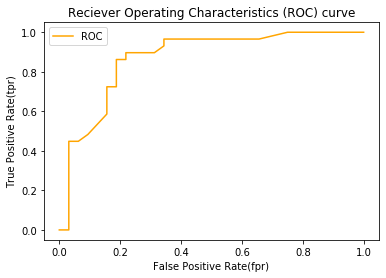

In [102]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots are ROC Curve given the false positive rate(fpr)
    and true positive rate (tpr) of a model.
    """
    
    # Plot ROC Curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    # Plot line with no predictive power(baseline)
    #plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    
    # Customize the plot
    plt.xlabel("False Positive Rate(fpr)")
    plt.ylabel("True Positive Rate(tpr)")
    plt.title("Reciever Operating Characteristics (ROC) curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [103]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8679956896551724

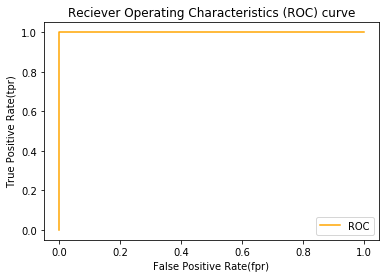

In [104]:
fpr,tpr,thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [105]:
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confision matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
In essence, giving you an idea of where the model is getting confused.

In [106]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test,y_preds )

array([[24,  8],
       [ 3, 26]], dtype=int64)

In [107]:
# Visualize the confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Prediscted labels"])

Prediscted labels,0,1
Actual Labels,,
0,24,8
1,3,26


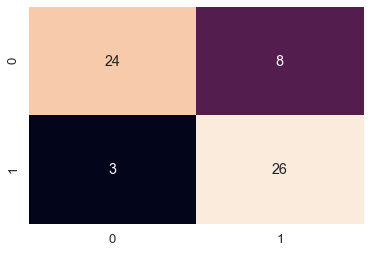

In [108]:
# make our confusion matrix more visual

import seaborn as sns

sns.set(font_scale=1.2)

# Create a Confusion Matrix
conf_mat= confusion_matrix(y_test, y_preds)
conf_mat1= confusion_matrix(y_test,y_test)

# Plot it using seaborn
sns.heatmap(conf_mat,annot=True,cbar=False)


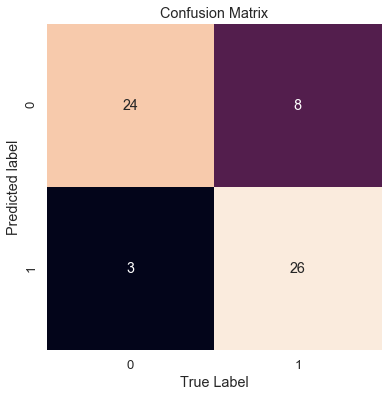

In [109]:
def plot_conf_mat(conf_mat):
    """
    Plot Confusion Matrix
    """
    fig,ax = plt.subplots(figsize=(6,6))
    ax = sns.heatmap(conf_mat,annot=True, # Annotatethe boxes with conf_mat info
                    cbar = False)
    ax.set(title="Confusion Matrix",
           xlabel= "True Label",
           ylabel= "Predicted label");
plot_conf_mat(conf_mat)

**Confusion Matrix**

In [110]:
conf_mat

array([[24,  8],
       [ 3, 26]], dtype=int64)

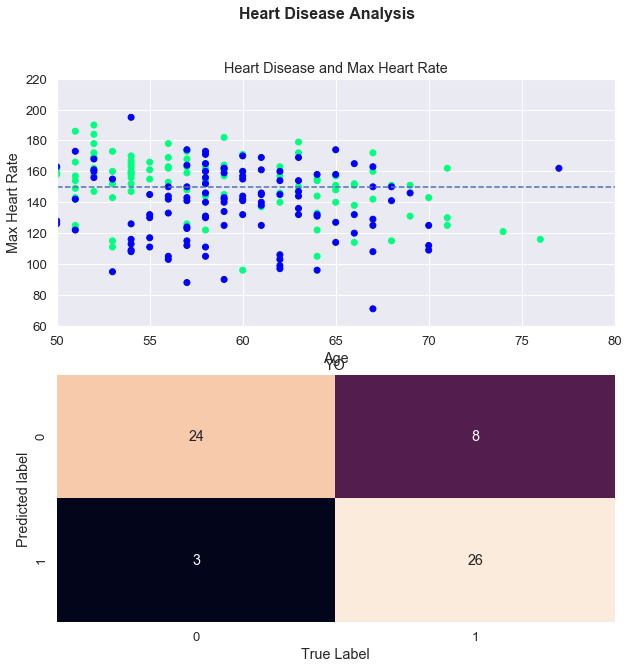

In [111]:
import seaborn as sns
# Customizing the x and y axis
# Subplot of chol, age, thalach
fig, (ax1,ax0) = plt.subplots(nrows=2,
                             ncols=1,
                             figsize=(10,10));

# Add data to ax0


# Add data to ax1

ax1.scatter(x=heart_disease["age"],
                     y=heart_disease["thalach"],
                     c=heart_disease["target"],
                     cmap='winter')

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate",
       xlabel="Age",
       ylabel="Max Heart Rate");

ax1.set_xlim([50,80])
ax1.set_ylim([60,220])

# Add a legend


# Add a meanline
ax1.axhline(y=heart_disease["thalach"].mean(),linestyle='--')
ax0 = sns.heatmap(conf_mat,annot=True, # Annotatethe boxes with conf_mat info
                    cbar = False)
ax0.set(title="YO",
           xlabel= "True Label",
           ylabel= "Predicted label");


# Add a Title to the Figure!
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="heavy");

### Classification Report

In [112]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.76      0.90      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [113]:
disease_true = np.zeros(10000)
disease_true[0]=1

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,disease_preds,
                                  output_dict=True))

C:\Users\mkuma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


 # Regression Model Evaluation Metrics

Model evaluation metrics->
1. R^2 or coefficient of determination.
2. Mean absolute error
3. Mean squared error

In [114]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=boston_df.drop("target",axis=1)
y= boston_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [115]:
model.score(x_test,y_test)

0.873969014117403

### R^2
Compares your models predictions to the mean of the targets.Values can range from negetive infinity(a very poor model) to 1. 


* `1. Fo e.g, if all our model does, is predict the mean of the targets, its R^2 value would be 0.`
* `2. And if our model predicts perfectly predicts a range of numbers its R^2 value would be 1.`

In [116]:
from sklearn.metrics import r2_score

# fill an array with y_test mean

y_test_mean = np.full(len(y_test),y_test.mean())

In [117]:
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [118]:
y_test.mean()

21.488235294117654

In [119]:
r2_score(y_test,y_test_mean)

2.220446049250313e-16

In [120]:
r2_score(y_test,y_test)

1.0

## Mean Absolute Error

In [121]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test,y_preds)
mae

2.1226372549019623

In [122]:
df = pd.DataFrame(data={"actual values":y_test,
                       "predicted values":y_preds})
df["differences"] = (df["predicted values"] - df["actual values"])
df

,actual values,predicted values,differences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


In [123]:
df["differences"]=df["differences"].abs()

In [124]:
df["differences"].mean(),mae

(2.1226372549019614, 2.1226372549019623)

## Mean Squared Error (MSE)

In [125]:
# For the same example above leats find the mean squared error

df1 = pd.DataFrame(data={"actual values":y_test,
                       "predicted values":y_preds})
df1["differences"] = (df["predicted values"] - df["actual values"])
df1

,actual values,predicted values,differences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


In [126]:
df1["differences"] = df1["differences"]**2

In [127]:
df1

,actual values,predicted values,differences
173,23.6,23.002,0.357604
274,32.4,30.826,2.477476
491,13.6,16.734,9.821956
72,22.8,23.467,0.444889
452,16.1,16.853,0.567009
...,...,...,...
412,17.9,13.030,23.716900
436,9.6,12.490,8.352100
411,17.2,13.406,14.394436
86,22.5,20.219,5.202961


In [128]:
mean_sq_err = df1["differences"].mean()

In [129]:
mean_sq_err

9.24232899019608

In [130]:
df1["differences"]

173     0.357604
274     2.477476
491     9.821956
72      0.444889
452     0.567009
         ...    
412    23.716900
436     8.352100
411    14.394436
86      5.202961
75      6.240004
Name: differences, Length: 102, dtype: float64

In [131]:
df1["differences"]=df1["differences"]**2

In [132]:
df1["differences"] = np.sqrt(df1["differences"])

In [133]:
df1["differences"]

173     0.357604
274     2.477476
491     9.821956
72      0.444889
452     0.567009
         ...    
412    23.716900
436     8.352100
411    14.394436
86      5.202961
75      6.240004
Name: differences, Length: 102, dtype: float64

In [134]:
df1["differences"].mean()

9.24232899019608

In [135]:
df1["differences"].sum()

942.7175570000004

In [136]:
df1["differences"].sum()/len(df1["differences"])

9.242328990196082

### Scoring Parameter

In [137]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_disease.drop("target",axis=1)
y= heart_disease["target"]

clf=RandomForestClassifier()

In [138]:
np.random.seed(42)
cv_acc = cross_val_score(clf,x,y,cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [139]:
print(f"The cross-validated accuracy is:{np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is:82.48%


In [140]:
np.random.seed(42)
cv_acc = cross_val_score(clf,x,y,cv=5,scoring="accuracy")
print(f"The cross-validated accuracy is:{np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is:82.48%


In [141]:
cv_precision = cross_val_score(clf,x,y,cv=5,scoring="precision")
np.mean(cv_precision)*100

80.85601538512755

In [142]:
cv_recall = cross_val_score(clf,x,y,cv=5,scoring="recall")
np.mean(cv_recall)*100

84.24242424242424

In [143]:
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring="f1")
np.mean(cv_f1)*100

84.14765334168321

In [144]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=boston_df.drop("target",axis=1)
y=boston_df["target"]
model = RandomForestRegressor(n_estimators=100)

In [145]:
np.random.seed(42)
cv_r2 = cross_val_score(model,x,y,cv=5,scoring=None)
np.mean(cv_r2)

0.622375083951403

In [146]:
np.random.seed(42)
cv_r2 = cross_val_score(model,x,y,cv=5,scoring="r2")
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [147]:
cv_mae = cross_val_score(model,x,y,cv=5,scoring="neg_mean_absolute_error")
cv_mae

array([-2.12751961, -2.53956436, -3.42026733, -3.82432673, -3.06893069])

In [148]:
cv_mse = cross_val_score(model,x,y,cv=5,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.02253826604542

 ### NOTE
 So when we used just mean squared error we got 9.242 whereas now that
 we used cross validation score with multiple tries our mean squared error value increased 
